Project completed on 2023-08-08 by Aliaksandr Naumkin

# Credit Risk Classification

This dataset classifies people described by a set of attributes as good or bad credit risks.

## Aim

The aim of this dataset could be to build a predictive model that can determine the creditworthiness of customers based on their attributes. By using the features provided, the goal is to train a machine learning model that can predict whether a customer is "good" or "bad" for credit, which can help lenders make informed decisions when granting credit to applicants.

## Dataset discription

The dataset has 1000 rows and 21 features.
The various features of the dataset are explained below:
1. **checking_status**: This feature represents the status of the checking account of the customer. It may have categorical values like "no checking" "< 0" (less than 0), "0 <= x < 200" ">= 200" (greater than or equal to 200). It provides information about the financial stability of the customer.

2. **duration**: This feature denotes the duration of the credit in months. It is a numerical value that indicates how long the credit is expected to be active.

3. **credit_history**: This feature provides information about the credit history of the customer. It may include categories like 'existing paid', 'critical/other existing credit', 'delayed previously', 'all paid', 'no credits/all paid'.

4. **purpose**: This feature describes the purpose for which the credit is being requested. It may include categories like 'radio/tv', 'new car', 'furniture/equipment', 'used car' ,'business', 'education', 'repairs', 'domestic appliance', 'other', 'retraining'.

5. **credit_amount**: This numerical feature represents the amount of credit requested by the customer.

6. **savings_status**: This feature indicates the status of the customer's savings account. It may have categories like '<100', 'no known savings', '100<=X<500', '500<=X<1000', '>=1000'.

7. **employment**: This feature represents the employment status of the customer and may include values like '<1','1<=X<4', '4<=X<7','>=7',   'unemployed'.

8. **installment_commitment**: This feature represents the percentage of the disposable income that the customer has to commit to in paying off other credits.

9. **personal_status**: This feature provides information about the personal status of the customer, including categories like 'male single', 'female div/dep/mar', 'male mar/wid', 'male div/sep'.

10. **other_parties**: This feature indicates if other parties are involved in the credit application. It may include values like "none," "guarantor," "co-applicant."

11. **residence_since**: This numerical feature represents the duration of residence at the current address in years.

12. **property_magnitude**: This feature describes the magnitude of the customer's property and may include values like 'car', 'real estate', 'life insurance', 'no known property'.

13. **age**: This numerical feature represents the age of the customer.

14. **other_payment_plans**: This feature indicates if the customer has any other payment plans and may include categories like "bank", "stores", "none".

15. **housing**: This feature represents the housing situation of the customer and may include values like "rent," "own," "for free."

16. **existing_credits**: This numerical feature denotes the number of existing credits that the customer already has.

17. **job**: This feature represents the type of job the customer has and may include categories like 'skilled', 'unskilled resident', 'high qualif/self emp/mgmt', 'unemp/unskilled non res'.

18. **num_dependents**: This numerical feature represents the number of dependents the customer has.

19. **own_telephone**: This binary feature indicates whether the customer owns a telephone 'yes' or 'none'.

20. **foreign_worker**: This binary feature indicates whether the customer is a foreign worker 'yes' or 'no'.

21. **class**: This is the target feature that you want to predict. It represents whether the customer is considered "good" or "bad" for credit

### **Contents:**
- [Initialization](#initialization)
- [Data understanding](#data-understanding)
- [Data cleaning](#data-cleaning)
- [Feature engineering](#feature-engineering)
    - [Standardization](#standardization)
    - [Normalization](#normalization)
- [Modeling](#modeling)
- [Improvement](#improvement)
- [Evaluation](#evaluation)
- [Conclusion](#conclusion)

### Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV


Code assumes the dataset is in the same folder as the .ipynb file

Loading the dataset from csv file

In [2]:
data = pd.read_csv('credit_customers.csv')

#for better review need to expand the amount of visible features
pd.set_option('display.max_columns', 30)

data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


### Data understanding

Checking data types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

*Here we can see 2 types of data: object and float. By the way we can admit, that here no null values*

Checking categorical values for typos and incorrect names

In [4]:
for cat_column in data.select_dtypes(exclude=['Int64', 'Float64']):
    print('\n')
    print(data[cat_column].value_counts())



checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64


credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64


purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64


savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: count, dtype: int64


employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: count, dtype: int64


personal_status
male single           548
femal

*Categorical features don't have incorrect values*

Checking numerical values for outliers

In [5]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


*All the features look good and credible, but I want to check credit amount for outliers.*

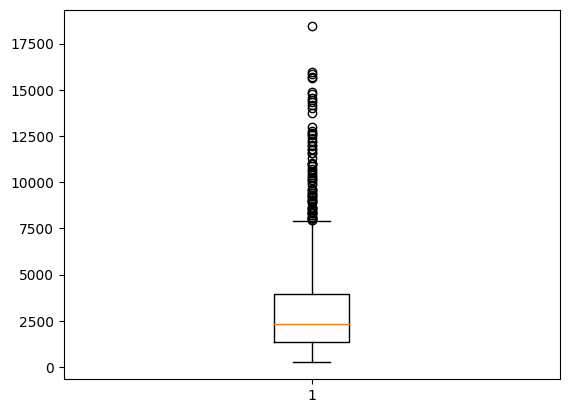

In [6]:
plt.boxplot(data.credit_amount);

*The values of credit amount do not contain outliers*

### Data cleaning

Make sure we dont have null-values

In [7]:
data.columns[data.any().isna()].to_list()

[]

Check rows for duplicates

In [8]:
data[data.duplicated() == True]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class


*Don't have duplicates*

### Feature engineering

Conversion categorical features into numerical

In [9]:
#creating list of features with 'object' data type
cat_data = data.drop('class', axis=1).select_dtypes(include=object)

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(cat_data)
ohe_data = ohe.transform(cat_data)
data[ohe.get_feature_names_out()] = ohe_data
data.drop(cat_data.columns, axis=1, inplace=True)

changing target feature into numerical

In [10]:
data['class'].replace({'good': 1, 'bad': 0}, inplace=True)

For making impact of features more equal and not depended from scale, need to modify it. Because of I'm not sure which way to scale will be better, I decided to do it in two ways, normalization and standardization, and check which one will gives me better result

#### Standardization

In [11]:
#creating dataframe with numerical features
data_std = data.copy()

Std = StandardScaler()
std_scaled_data = Std.fit_transform(data_std[['duration', 'credit_amount', 'age']])
data_std[['duration', 'credit_amount', 'age']] = std_scaled_data
del std_scaled_data

data_std

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,...,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,-1.236478,-0.745131,4.0,4.0,2.766456,2.0,1.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2.248194,0.949817,2.0,2.0,-1.191404,1.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.738668,-0.416562,2.0,3.0,1.183312,1.0,2.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.750384,1.634247,2.0,4.0,0.831502,1.0,2.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.256953,0.566664,3.0,4.0,1.535122,2.0,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,3.0,4.0,-0.399832,1.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
996,0.754763,0.207612,4.0,4.0,0.391740,1.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
997,-0.738668,-0.874503,4.0,4.0,0.215835,1.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
998,1.999289,-0.505528,4.0,4.0,-1.103451,1.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Normalization

In [12]:
#creating dataframe with numerical features
data_norm = data.copy()

min_max = MinMaxScaler()
min_max_scaled_data = Std.fit_transform(data_norm[['duration', 'credit_amount', 'age']])
data_norm[['duration', 'credit_amount', 'age']] = min_max_scaled_data
del min_max_scaled_data

data_norm

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,...,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,-1.236478,-0.745131,4.0,4.0,2.766456,2.0,1.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2.248194,0.949817,2.0,2.0,-1.191404,1.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.738668,-0.416562,2.0,3.0,1.183312,1.0,2.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.750384,1.634247,2.0,4.0,0.831502,1.0,2.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.256953,0.566664,3.0,4.0,1.535122,2.0,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,3.0,4.0,-0.399832,1.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
996,0.754763,0.207612,4.0,4.0,0.391740,1.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
997,-0.738668,-0.874503,4.0,4.0,0.215835,1.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
998,1.999289,-0.505528,4.0,4.0,-1.103451,1.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### Modeling

The choice of the best model ultimately depends on factors such as the size of our dataset, the complexity of the relationship between features and the target variable, interpretability requirements, and computational resources available.

For our task I'll try different models such as:
- Logistic Regression

- Random Forest Classifier

- Linear SVC

- MLPClassifier

Before modeling need to split data for features and target

In [13]:
features_std = data_std.drop('class', axis=1)
features_norm = data_norm.drop('class', axis=1)
target = data['class']

Creating list of models

In [14]:
models = [LogisticRegression(max_iter=2000, random_state=42),
          RandomForestClassifier(random_state=42),
          LinearSVC(dual='auto', max_iter=2000, random_state=42),
          MLPClassifier(max_iter=2000, random_state=42)]

Before I start to train different models, I should define which metrics I will use. Here are the most common metrics for such dataset and task:

* **Accuracy**: This metric represents the overall correctness of the predictions.
    - (True Positive + True Negative) / Total Predictions

* **Precision**: Precision measures the proportion of correctly predicted "good" credit customers among all the customers predicted as "good".
    - True Positive / (True Positive + False Positive)

* **Sensitivity** (Recall): Sensitivity measures the proportion of actual "good" credit customers that are correctly predicted as "good" by the model. 
    - True Positive / (True Positive + False Negative)

* **Specificity**: Specificity measures the proportion of actual "bad" credit customers that are correctly predicted as "bad" by the model.
    - True Negative / (True Negative + False Positive)

* **ROC AUC**: The ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a measure of the model's ability to distinguish between "good" and "bad" credit customers.


For all metrics values closer to 1 indicates better performance.

For our task the most important metric is specificity, cause it shows how my model manage with first type error and percentage of false positive predictions from all positive, cause it will cause additional risks of loss for bank.

Starting modeling for standardized data

In [15]:
#dataframe with metrics
metrics_std = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'sensitivity', 'specificity', 'ROC AUC'])

x_train, x_test, y_train, y_test = train_test_split(features_std, target, train_size=0.8, random_state=42)

for i, model in enumerate(models):
    
    model_train = model
    model_train = model.fit(x_train, y_train)
    model_predict = model_train.predict(x_test)

    accuracy = accuracy_score(y_test, model_predict)
    precision = precision_score(y_test, model_predict)
    sensitivity = recall_score(y_test, model_predict)
    speciificity = recall_score(y_test, model_predict, pos_label=0)
    roc_auc = roc_auc_score(y_test, model_predict)

    metrics_std.loc[i] = ([type(model).__name__, accuracy, precision, sensitivity, speciificity, roc_auc])

metrics_std

,model,accuracy,precision,sensitivity,specificity,ROC AUC
0,LogisticRegression,0.800,0.830065,0.900709,0.559322,0.730016
1,RandomForestClassifier,0.775,0.796296,0.914894,0.440678,0.677786
2,LinearSVC,0.810,0.836601,0.907801,0.576271,0.742036
3,MLPClassifier,0.775,0.833333,0.851064,0.593220,0.722142


Will do the same for normalized data

In [16]:
#dataframe with metrics
metrics_norm = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'sensitivity', 'specificity', 'ROC AUC'])

x_train, x_test, y_train, y_test = train_test_split(features_norm, target, train_size=0.8, random_state=42)

for i, model in enumerate(models):
    
    model_train = model
    model_train = model.fit(x_train, y_train)
    model_predict = model_train.predict(x_test)

    accuracy = accuracy_score(y_test, model_predict)
    precision = precision_score(y_test, model_predict)
    sensitivity = recall_score(y_test, model_predict)
    speciificity = recall_score(y_test, model_predict, pos_label=0)
    roc_auc = roc_auc_score(y_test, model_predict)

    metrics_norm.loc[i] = ([type(model).__name__, accuracy, precision, sensitivity, speciificity, roc_auc])

metrics_norm

,model,accuracy,precision,sensitivity,specificity,ROC AUC
0,LogisticRegression,0.800,0.830065,0.900709,0.559322,0.730016
1,RandomForestClassifier,0.775,0.796296,0.914894,0.440678,0.677786
2,LinearSVC,0.810,0.836601,0.907801,0.576271,0.742036
3,MLPClassifier,0.775,0.833333,0.851064,0.593220,0.722142


As result I can admit that here's no difference between normalized and standardized data. So all next manipulations I'll do on standardized data.
The best specificity result have MLPClassifier, but for LinearSVC specificity result is not much less, but another metrics are noticeably better.
In such way I will prefer to use LinearSV Classifier as final model

### Improvement

Using GridSeardCV I want to tune my model with different parameters

In [17]:
# Define the specificity scoring function
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

# Create the scorer object
specificity_scorer = make_scorer(specificity_score)

param_grid = {'hidden_layer_sizes': [[100], [100,100], [100, 100, 100]], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, scoring=specificity_scorer)

grid_search.fit(features_std, target)

print(f'best score: {grid_search.best_score_}')
print(f'best params: {grid_search.best_params_}')

C:\Users\aliak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aliak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aliak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aliak\A

best score: 0.5533333333333333
best params: {'activation': 'tanh', 'hidden_layer_sizes': [100, 100, 100], 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\aliak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


*For some reason, the result is worse, than for model with standart parameters*

The final configuration of my MLPClassifier is standardized data with standard parameters of classifier.

In [18]:
metrics_std = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'sensitivity', 'specificity', 'ROC AUC'])

x_train, x_test, y_train, y_test = train_test_split(features_std, target, train_size=0.8, random_state=42)
    
mlp = MLPClassifier(max_iter=2000)
mlp.fit(x_train, y_train)
mlp_predict = mlp.predict(x_test)

accuracy = accuracy_score(y_test, mlp_predict)
precision = precision_score(y_test, mlp_predict)
sensitivity = recall_score(y_test, mlp_predict)
speciificity = recall_score(y_test, mlp_predict, pos_label=0)
roc_auc = roc_auc_score(y_test, mlp_predict)

metrics_std.loc[0] = (['MLPClassifier', accuracy, precision, sensitivity, speciificity, roc_auc])

metrics_std

,model,accuracy,precision,sensitivity,specificity,ROC AUC
0,MLPClassifier,0.775,0.852941,0.822695,0.661017,0.741856


### Evaluation

In summary, the MLP classifier demonstrates balanced precision and sensitivity along with moderate accuracy and ROC AUC, which are positive indicators for creditworthiness prediction.

Additionally, I can conduct further analysis such as feature importance to identify which features have the most impact on the model's predictions and possibly refine the dataset or feature engineering techniques to improve the model's performance. Regular evaluation and monitoring of the model's performance on new data will also be necessary to ensure its continued effectiveness.

In [19]:
#applying flatten() method to returned value of coefs_ for making simple float values instead of single arrays
mlp_coef = dict(zip(features_std.columns, np.array(mlp.coefs_[1]).flatten()))
mlp_coef_sorted = dict(sorted(mlp_coef.items(), key=lambda item: item[1]))
mlp_coef_sorted

{'other_parties_none': -1.639112723687057,
 'purpose_furniture/equipment': -1.5689471626569782,
 'purpose_repairs': -1.5208602908988396,
 'other_payment_plans_none': -1.4761573827102785,
 'employment_<1': -1.4167767305306915,
 'housing_own': -1.3642645662963442,
 'foreign_worker_no': -1.3628612319104418,
 'other_payment_plans_bank': -1.3273804416423067,
 'property_magnitude_life insurance': -1.305604397774594,
 'purpose_radio/tv': -1.1468144216320033,
 'job_unskilled resident': -1.1411047406748487,
 'credit_amount': -1.0860029719112834,
 'personal_status_male mar/wid': -1.0021949401285053,
 'savings_status_>=1000': -0.8443203247780053,
 'employment_1<=X<4': -0.7479235741277376,
 'checking_status_0<=X<200': -0.6439960930439957,
 'other_parties_co applicant': -0.6426551488404671,
 'property_magnitude_real estate': -0.6398831630024667,
 'credit_history_all paid': -0.617307243204002,
 'installment_commitment': -0.5118422976982071,
 'checking_status_<0': -0.35801196596166496,
 'job_high qua

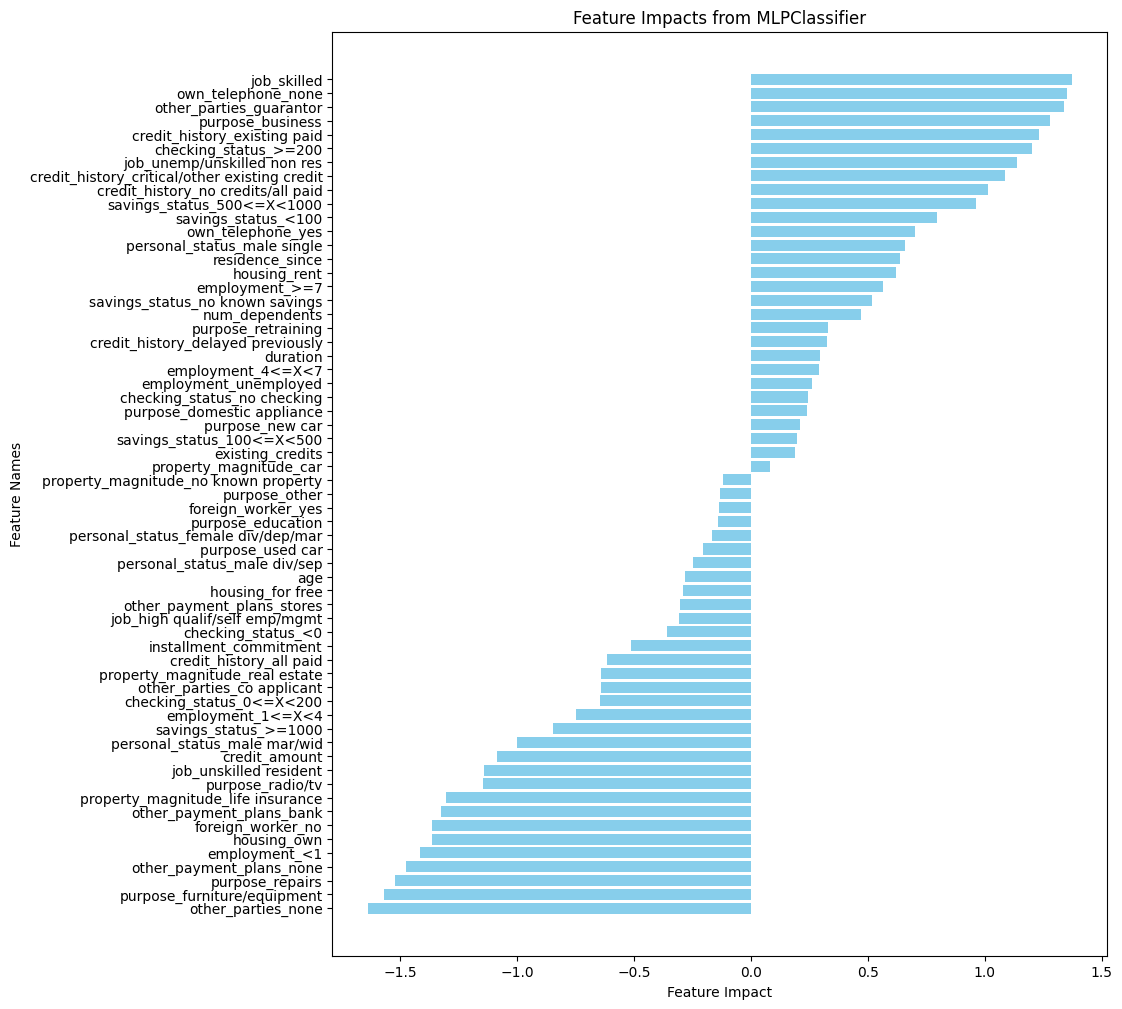

In [20]:
feature_names = list(mlp_coef_sorted.keys())
feature_impacts = list(mlp_coef_sorted.values())

# Create a bar plot
plt.figure(figsize=(10, 12))
plt.barh(feature_names, feature_impacts, color='skyblue')
plt.xlabel('Feature Impact')
plt.ylabel('Feature Names')
plt.title('Feature Impacts from MLPClassifier')
plt.show()

### Conclusion

Overall, the model seems to perform reasonably well. However, it's important to note that there is room for improvement, especially in terms of specificity, which is relatively lower compared to other metrics. Depending on the specific business requirements and the cost associated with misclassifications, the model could be further fine-tuned or another algorithm could be explored to achieve a better balance between precision and sensitivity.